# Imported needed packages

In [3]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt

# read in the covid data and remove the following columns

>All-cause death count, 2018

>All-cause death count, 2017

>Log of average distance to SARS countries

# round all floats to three decimal places

In [4]:
#my_path = os.chdir('/Users/colinobrien/Desktop/Repo/DS_5100/ds5100_prog_for_ds_jv')
COVID_data = pd.read_excel('MortalityDataWHR2021C2.xlsx')
#print(COVID_data.columns)

cols_to_remove = ['Island','All-cause death count, 2018','All-cause death count, 2017','Log of average distance to SARS countries']
removed_cols = COVID_data[cols_to_remove]

COVID_data_cleaned = COVID_data.drop(cols_to_remove, axis=1)
pd.options.display.float_format = '{:.3f}'.format 
#COVID_data_cleaned 

# read in the 2020 and 2021 happiness data.
## rename the columns to include a '20_' or '21_' 
## rename country name and regional indicators (and drop regional indicators from one of them) to make merging easier later

In [5]:
happy20 = pd.read_csv('WHR2020.csv')

old_header = list(happy20.columns.values)
new_header = ['20_' + i for i in old_header]


happy20_cleaned1 = pd.read_csv('WHR2020.csv', names = new_header, header = None, skiprows=1)
happy20_cleaned1 = happy20_cleaned1.rename(columns = {'20_Country name':'Country name'})
happy20_cleaned = happy20_cleaned1.drop('20_Regional indicator', axis=1)

In [6]:
happy21 = pd.read_csv('world-happiness-report-2021.csv')

old_header2 = list(happy21.columns.values)
new_header2 = ['21_' + i for i in old_header2]


happy21_cleaned = pd.read_csv('world-happiness-report-2021.csv', names = new_header2, header = None,  skiprows=1)
happy21_cleaned = happy21_cleaned.rename(columns = {'21_Country name':'Country name', '21_Regional indicator':'Regional indicator'})

# merge happiness data on country name

## I merged with how='left' so that it dropped countries that were only taken for one of the two years

In [7]:
happy_21_and_20 = pd.merge(happy21_cleaned, happy20_cleaned , on="Country name", how='left')

# I created columns that take the difference between the numeric columns of 2020 and 2021

In [8]:
happy_covid_column_list = list(happy_21_and_20.columns)
cols_for_21 = [i for i in happy_covid_column_list if i.startswith('21_')]
cols_for_20 = [i for i in happy_covid_column_list if i.startswith('20_')]

for new_col in range(len(cols_for_21)):
    happy_21_and_20[cols_for_21[new_col][3:] + '_diff'] = happy_21_and_20[cols_for_21[new_col]] - happy_21_and_20[cols_for_20[new_col]]

#happy_21_and_20.columns

# merge all happiness (with the added difference columns) with the cleaned covid data

In [9]:
happy_and_COVID = pd.merge(happy_21_and_20, COVID_data_cleaned , on="Country name", how='left')
#happy_and_COVID.columns

# save the merged data into a csv

In [10]:
happy_and_COVID.to_csv("happy_and_COVID.csv", sep=",")

# Data exploration starts here

In [11]:
#list out all of the columns
list(happy_and_COVID.columns)

['Country name',
 'Regional indicator',
 '21_Ladder score',
 '21_Standard error of ladder score',
 '21_upperwhisker',
 '21_lowerwhisker',
 '21_Logged GDP per capita',
 '21_Social support',
 '21_Healthy life expectancy',
 '21_Freedom to make life choices',
 '21_Generosity',
 '21_Perceptions of corruption',
 '21_Ladder score in Dystopia',
 '21_Explained by: Log GDP per capita',
 '21_Explained by: Social support',
 '21_Explained by: Healthy life expectancy',
 '21_Explained by: Freedom to make life choices',
 '21_Explained by: Generosity',
 '21_Explained by: Perceptions of corruption',
 '21_Dystopia + residual',
 '20_Ladder score',
 '20_Standard error of ladder score',
 '20_upperwhisker',
 '20_lowerwhisker',
 '20_Logged GDP per capita',
 '20_Social support',
 '20_Healthy life expectancy',
 '20_Freedom to make life choices',
 '20_Generosity',
 '20_Perceptions of corruption',
 '20_Ladder score in Dystopia',
 '20_Explained by: Log GDP per capita',
 '20_Explained by: Social support',
 '20_Expl

In [12]:
happy_and_COVID.head()

,Country name,Regional indicator,21_Ladder score,21_Standard error of ladder score,21_upperwhisker,21_lowerwhisker,21_Logged GDP per capita,21_Social support,21_Healthy life expectancy,21_Freedom to make life choices,...,"COVID-19 deaths per 100,000 population in 2020",Median age,Index of exposure to COVID-19 infections in other countries as of March 31,WHO Western Pacific Region,Female head of government,Index of institutional trust,Gini coefficient of income,"All-cause death count, 2019","All-cause death count, 2020","Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average"
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,...,10.125,42.800,2.225,0.000,1.000,0.550,25.900,53821.000,55663.000,31.510
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,...,22.409,42.300,3.953,0.000,1.000,0.572,27.800,53805.000,55477.000,25.534
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,...,88.334,43.100,5.584,0.000,0.000,0.660,30.100,67515.000,77087.000,116.680
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,...,8.498,37.300,1.649,0.000,1.000,0.325,24.100,2261.000,2321.000,21.445
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,...,67.260,43.200,5.574,0.000,0.000,0.522,27.000,151547.000,171175.000,114.468


In [13]:
life_choices = happy_and_COVID[['Country name','21_Explained by: Freedom to make life choices', '20_Explained by: Freedom to make life choices']]


In [12]:
life_choices = life_choices[0:80]


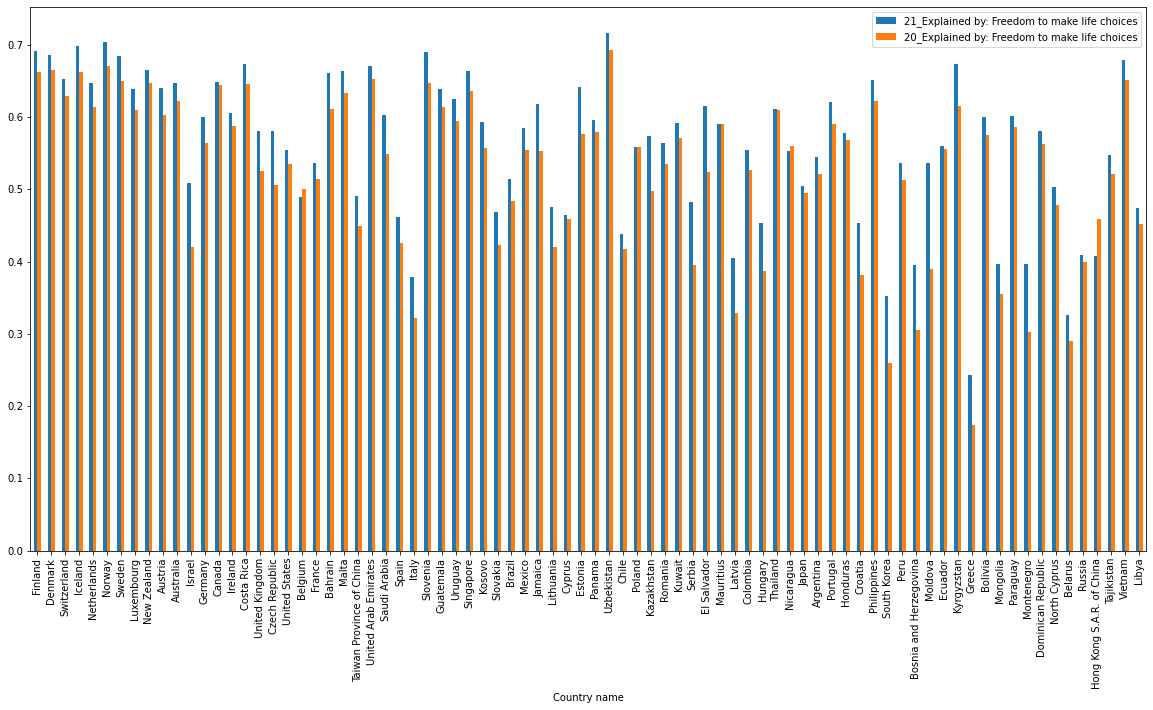

In [13]:
ax = life_choices.plot.bar(x = "Country name", figsize = (20,10))

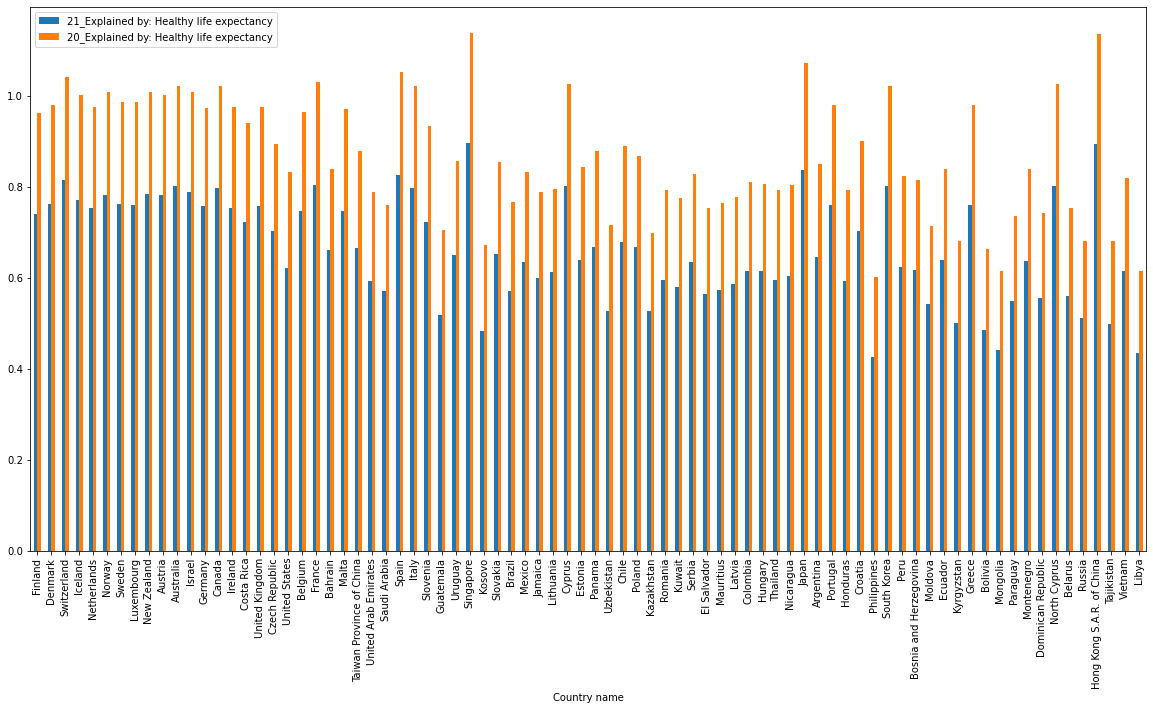

In [14]:
life_expect = happy_and_COVID[['Country name','21_Explained by: Healthy life expectancy', '20_Explained by: Healthy life expectancy']]
life_expect = life_expect[0:80]
ax1 = life_expect.plot.bar(x = "Country name", figsize = (20,10))

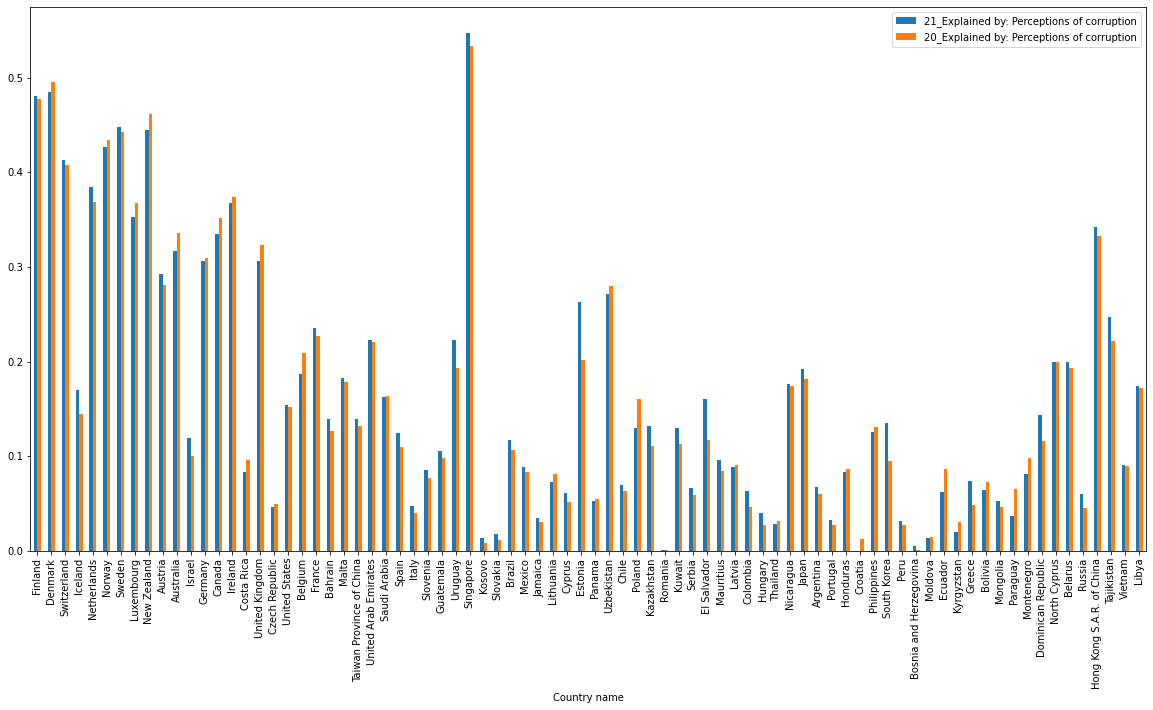

In [15]:
corrupt = happy_and_COVID[['Country name','21_Explained by: Perceptions of corruption', '20_Explained by: Perceptions of corruption']]
corrupt = corrupt[0:80]
ax2 = corrupt.plot.bar(x = "Country name", figsize = (20,10))

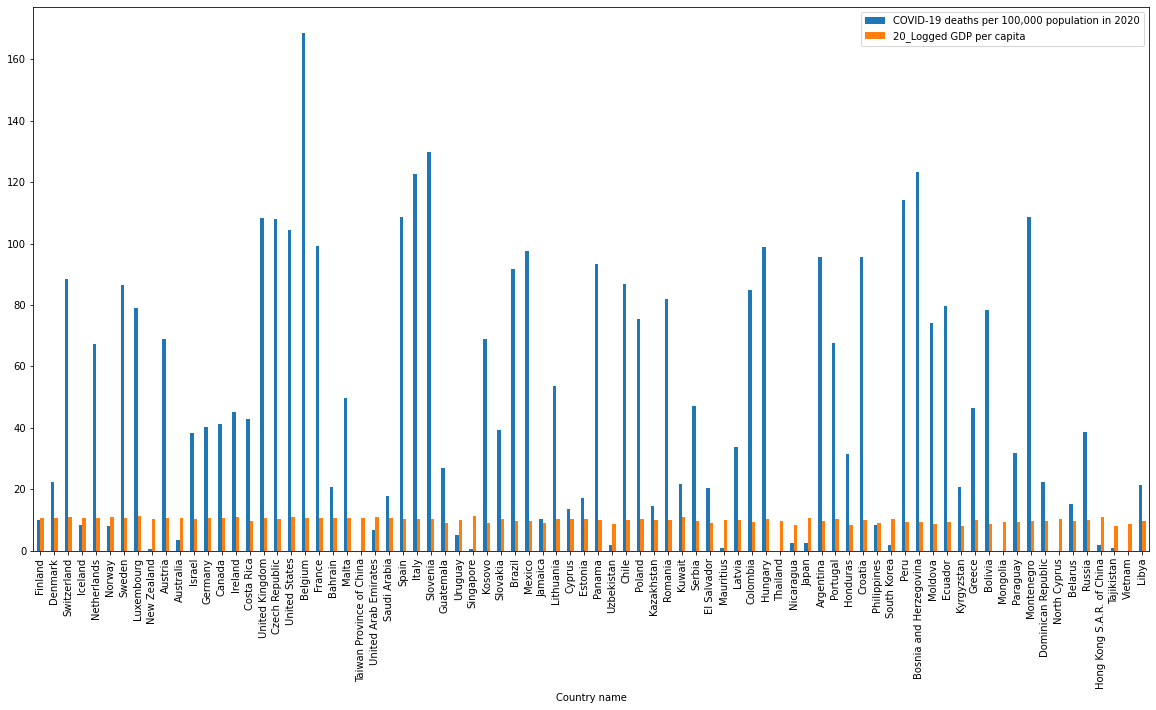

In [17]:
covid_gdp = happy_and_COVID[['Country name', 'COVID-19 deaths per 100,000 population in 2020', '20_Logged GDP per capita']]
covid_gdp = covid_gdp[0:80]
ax3 = covid_gdp.plot.bar(x = "Country name", figsize = (20,10))

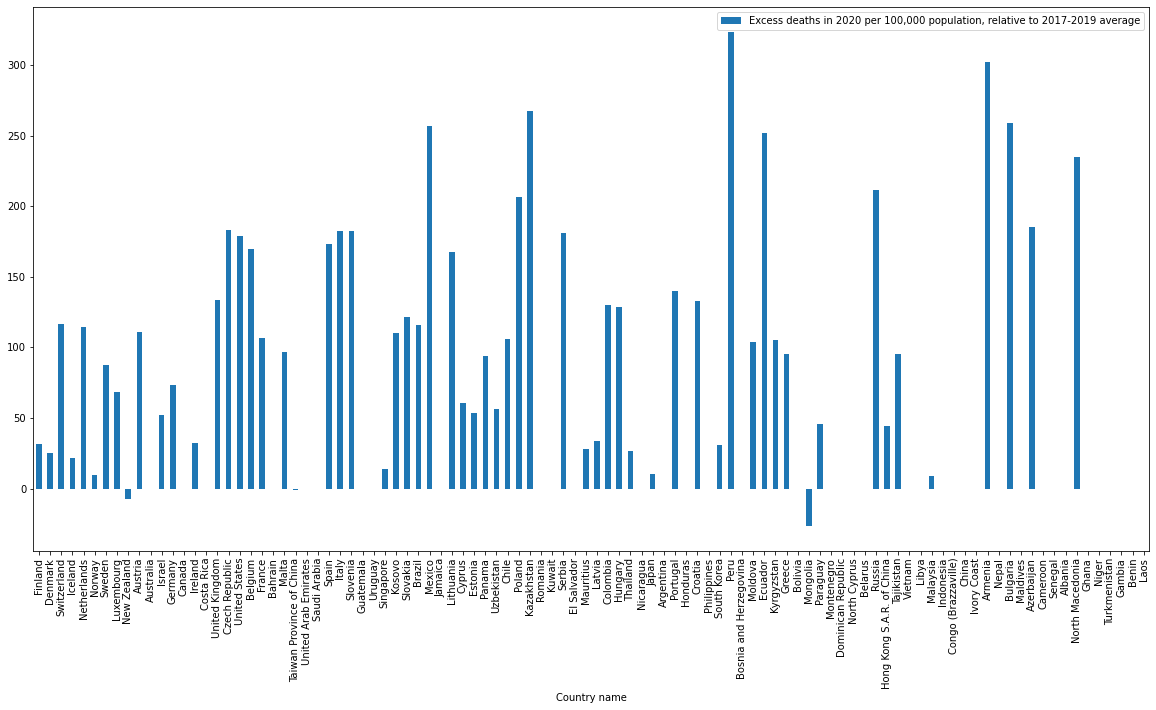

In [20]:
excess_deaths = happy_and_COVID[['Country name', 'Excess deaths in 2020 per 100,000 population, relative to 2017-2019 average']]
excess_deaths = excess_deaths[0:100]
ax4 = excess_deaths.plot.bar(x = "Country name", figsize = (20,10))

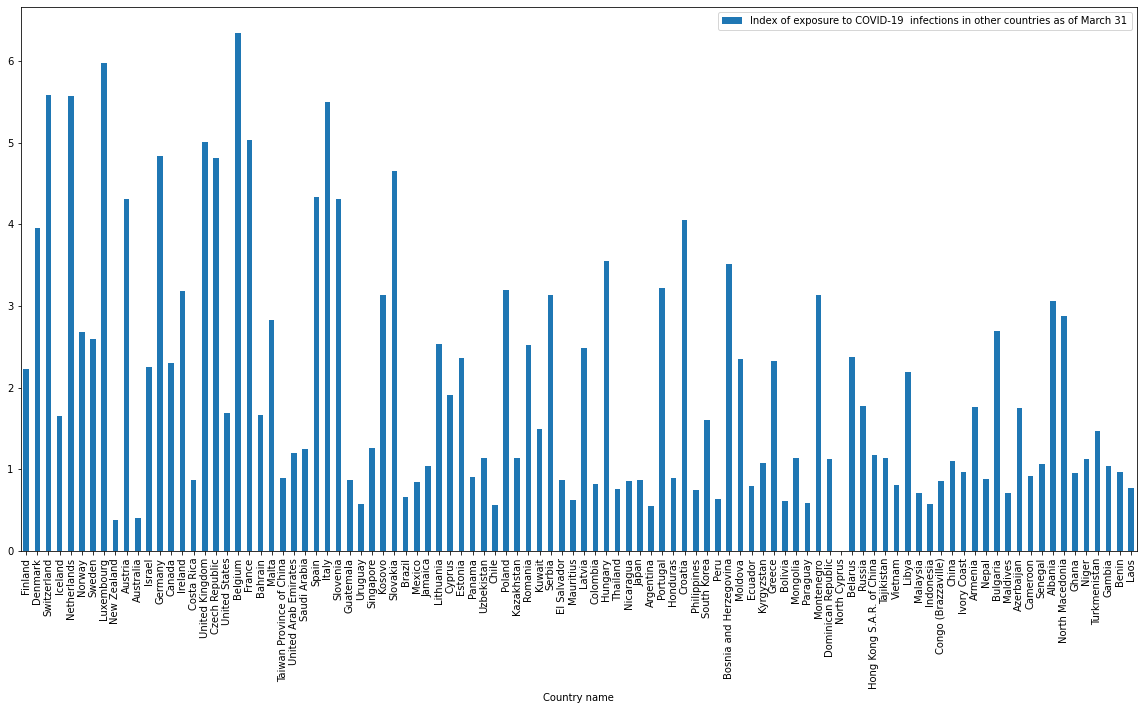

In [23]:
expose = happy_and_COVID[['Country name', 'Index of exposure to COVID-19  infections in other countries as of March 31']]
expose = expose [0:100]
ax5 = expose.plot.bar(x = "Country name", figsize = (20,10))

In [1]:
import sklearn 

In [102]:
#creating 2020 only df from cleaned df for regression
cols_2020 = ['20_Ladder score',
 '20_Logged GDP per capita',
 '20_Social support',
 '20_Healthy life expectancy',
 '20_Freedom to make life choices',
 '20_Generosity',
 '20_Perceptions of corruption',
 '20_Ladder score in Dystopia',
 '20_Explained by: Log GDP per capita',
 '20_Explained by: Social support',
 '20_Explained by: Healthy life expectancy',
 '20_Explained by: Freedom to make life choices',
 '20_Explained by: Generosity',
 '20_Explained by: Perceptions of corruption',
 '20_Dystopia + residual']

reg_20 = happy_and_COVID[cols_2020]

In [103]:
reg_20= reg_20.dropna()

In [104]:
from sklearn.model_selection import train_test_split
# Split the data into train set (80%) and test set (20%)
train_set, test_set = train_test_split(reg_20, test_size=0.2, random_state=42)

In [105]:
print(train_set.shape)
print(test_set.shape)

(118, 15)
(30, 15)


In [106]:
# Create the features and labels for training and testing
train_no_labs = train_set.drop("20_Ladder score", axis=1) # drop labels for training set
train_labels = train_set["20_Ladder score"]

test_no_labs = test_set.drop("20_Ladder score", axis=1) # drop labels for training set
test_labels = test_set["20_Ladder score"]

In [107]:
print(test_no_labs.shape)
print(test_labels.shape)

(30, 14)
(30,)


In [108]:
train_no_labs

,20_Logged GDP per capita,20_Social support,20_Healthy life expectancy,20_Freedom to make life choices,20_Generosity,20_Perceptions of corruption,20_Ladder score in Dystopia,20_Explained by: Log GDP per capita,20_Explained by: Social support,20_Explained by: Healthy life expectancy,20_Explained by: Freedom to make life choices,20_Explained by: Generosity,20_Explained by: Perceptions of corruption,20_Dystopia + residual
137,7.269,0.636,50.865,0.715,0.089,0.861,1.972,0.241,0.748,0.204,0.382,0.258,0.048,2.046
45,10.108,0.825,67.207,0.843,-0.198,0.934,1.972,1.120,1.194,0.792,0.535,0.068,0.001,2.413
120,8.030,0.703,60.097,0.830,0.295,0.831,1.972,0.476,0.905,0.536,0.519,0.394,0.067,1.685
27,10.482,0.890,73.602,0.665,-0.043,0.873,1.972,1.236,1.347,1.023,0.321,0.170,0.040,2.250
4,10.813,0.939,72.301,0.909,0.208,0.365,1.972,1.339,1.464,0.976,0.614,0.336,0.369,2.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,9.752,0.855,68.505,0.650,-0.076,0.783,1.972,1.010,1.266,0.839,0.303,0.149,0.098,1.881
107,9.226,0.629,64.495,0.802,-0.229,0.666,1.972,0.847,0.731,0.695,0.485,0.048,0.174,1.692
14,11.161,0.942,72.301,0.887,0.146,0.357,1.972,1.447,1.471,0.976,0.588,0.295,0.373,1.944
92,9.418,0.671,68.708,0.782,-0.042,0.896,1.972,0.907,0.830,0.846,0.462,0.171,0.025,1.641


In [109]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_no_labs, train_labels)

LinearRegression()

In [110]:
preds_2020 = lin_reg.predict(test_no_labs)

In [111]:
preds_2020

array([4.63341319, 6.16345887, 3.52741822, 6.86354631, 5.09479938,
       7.0757687 , 5.51037703, 6.37714044, 5.28561239, 7.29423519,
       6.40094288, 4.75063536, 3.47886003, 5.51501647, 3.75944287,
       5.54155058, 6.93955308, 5.45624358, 4.30798953, 6.44014258,
       6.39888701, 5.0531789 , 5.88977794, 4.55793957, 5.87077534,
       6.77282055, 5.60750853, 4.18624335, 5.19436362, 7.12860028])

In [112]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(test_labels, preds_2020)
lin_mse

1.0974974344735583e-09

In [114]:
#finding variable importance
lin_reg.coef_

array([ 4.17169262e+01, -4.69059678e-01, -1.42650890e+00, -1.63174380e+02,
       -9.95730143e+00,  3.06661847e+02, -8.45796038e-08, -1.33598413e+02,
        1.19861424e+00,  4.06235492e+01,  1.37143405e+02,  1.60556410e+01,
        4.75980455e+02,  1.00000203e+00])

In [115]:
#creating 2020 with covid data only df from cleaned df for regression

cols_2020_covid = ['20_Ladder score',
 '20_Logged GDP per capita',
 '20_Social support',
 '20_Healthy life expectancy',
 '20_Freedom to make life choices',
 '20_Generosity',
 '20_Perceptions of corruption',
 '20_Ladder score in Dystopia',
 '20_Explained by: Log GDP per capita',
 '20_Explained by: Social support',
 '20_Explained by: Healthy life expectancy',
 '20_Explained by: Freedom to make life choices',
 '20_Explained by: Generosity',
 '20_Explained by: Perceptions of corruption',
 '20_Dystopia + residual',
 'COVID-19 deaths per 100,000 population in 2020']
    
reg_20_covid = happy_and_COVID[cols_2020_covid]

In [116]:
reg_20_covid= reg_20_covid.dropna()

In [117]:
list(reg_20_covid.columns)

['20_Ladder score',
 '20_Logged GDP per capita',
 '20_Social support',
 '20_Healthy life expectancy',
 '20_Freedom to make life choices',
 '20_Generosity',
 '20_Perceptions of corruption',
 '20_Ladder score in Dystopia',
 '20_Explained by: Log GDP per capita',
 '20_Explained by: Social support',
 '20_Explained by: Healthy life expectancy',
 '20_Explained by: Freedom to make life choices',
 '20_Explained by: Generosity',
 '20_Explained by: Perceptions of corruption',
 '20_Dystopia + residual',
 'COVID-19 deaths per 100,000 population in 2020']

In [118]:
# Split the data into train set (80%) and test set (20%)
train_set_covid_20, test_set_covid_20 = train_test_split(reg_20_covid, test_size=0.2, random_state=42)

In [119]:
print(train_set_covid_20.shape)
print(test_set_covid_20.shape)

(116, 16)
(29, 16)


In [120]:
# Create the features and labels for training and testing
train_x_covid = train_set_covid_20.drop("20_Ladder score", axis=1) # drop labels for training set
train_y = train_set_covid_20["20_Ladder score"]

test_x_covid = test_set_covid_20.drop("20_Ladder score", axis=1) # drop labels for training set
test_y = test_set_covid_20["20_Ladder score"]

In [121]:
print(test_x_covid.shape)
print(test_y.shape)


(29, 15)
(29,)


In [122]:
lin_reg_covid_20 = LinearRegression()
lin_reg_covid_20.fit(train_x_covid, train_y)

LinearRegression()

In [123]:
preds_2020_covid = lin_reg_covid_20.predict(test_x_covid)

In [124]:
preds_2020_covid

array([5.45623802, 3.65280841, 6.3874095 , 6.86353635, 6.22845579,
       4.58299526, 4.28860962, 4.82931781, 4.67677242, 6.93954687,
       7.07577179, 5.8707815 , 4.18623961, 5.48875963, 5.53987072,
       5.88977859, 4.72408179, 3.92638656, 5.13173515, 5.69330843,
       4.75062999, 3.52741426, 7.12859519, 5.54154399, 6.3771403 ,
       6.12375999, 6.16345646, 5.55570758, 4.62365628])

In [125]:
lin_mse = mean_squared_error(test_y, preds_2020_covid)
lin_mse

1.1715538256997079e-09

In [126]:
#finding variable importance
lin_reg_covid_20.coef_

array([ 3.89673256e+01,  1.64777378e+01,  1.32837397e+00, -9.92891639e-01,
       -1.61934897e+01,  4.29858829e+02, -2.04660552e-07, -1.24726904e+02,
       -5.97633697e+00, -3.58976565e+01,  1.82846595e+00,  2.54848855e+01,
        6.66797012e+02,  1.00000233e+00, -8.43614051e-08])

In [157]:
#creating 2020 without covid data only df from cleaned df for regression

cols_2021 = ['21_Ladder score',
 '21_Logged GDP per capita',
 '21_Social support',
 '21_Healthy life expectancy',
 '21_Freedom to make life choices',
 '21_Generosity',
 '21_Perceptions of corruption',
 '21_Ladder score in Dystopia',
 '21_Explained by: Log GDP per capita',
 '21_Explained by: Social support',
 '21_Explained by: Healthy life expectancy',
 '21_Explained by: Freedom to make life choices',
 '21_Explained by: Generosity',
 '21_Explained by: Perceptions of corruption',
 '21_Dystopia + residual']
    
reg_21 = happy_and_COVID[cols_2021]

In [158]:
reg_21= reg_21.dropna()

In [159]:
list(reg_21.columns)

['21_Ladder score',
 '21_Logged GDP per capita',
 '21_Social support',
 '21_Healthy life expectancy',
 '21_Freedom to make life choices',
 '21_Generosity',
 '21_Perceptions of corruption',
 '21_Ladder score in Dystopia',
 '21_Explained by: Log GDP per capita',
 '21_Explained by: Social support',
 '21_Explained by: Healthy life expectancy',
 '21_Explained by: Freedom to make life choices',
 '21_Explained by: Generosity',
 '21_Explained by: Perceptions of corruption',
 '21_Dystopia + residual']

In [160]:
train_set_21, test_set_21 = train_test_split(reg_21, test_size=0.2, random_state=42)

In [161]:
print(train_set_21.shape)
print(test_set_21.shape)

(119, 15)
(30, 15)


In [162]:
# Create the features and labels for training and testing
train_x_21= train_set_21.drop("21_Ladder score", axis=1) # drop labels for training set
train_y_21 = train_set_21["21_Ladder score"]

test_x_21 = test_set_21.drop("21_Ladder score", axis=1) # drop labels for training set
test_y_21 = test_set_21["21_Ladder score"]

In [163]:
# fit the model
lin_reg_21 = LinearRegression()
lin_reg_21.fit(train_x_21, train_y_21)

LinearRegression()

In [164]:
#output
preds_2021 = lin_reg_21.predict(test_x_21)
preds_2021

array([5.535007  , 6.95101925, 4.72040914, 5.41111181, 5.47660845,
       6.37734459, 5.76625839, 3.65764975, 5.71709023, 5.34105397,
       4.87431694, 7.15480379, 6.30975443, 7.26747648, 6.83435068,
       5.92970325, 4.07439627, 5.67762293, 5.94050719, 4.28280966,
       6.43456461, 4.57383662, 6.49182727, 4.35559804, 4.32535065,
       3.51210681, 4.85455315, 4.98490213, 6.14136316, 6.43112407])

In [165]:
#mean squared error
lin_mse = mean_squared_error(test_y_21, preds_2021)
lin_mse

4.2920442010693695e-07

In [166]:
#finding variable importance
lin_reg_21.coef_

array([ 2.68006383e-01,  7.09582807e-01,  2.54863248e-02,  3.52983218e-01,
        3.83125699e-01, -4.86279825e-01, -1.77635684e-15,  2.32978513e-01,
        6.84614588e-01,  1.90668920e-01,  7.10441633e-01,  4.12209831e-01,
        2.38189442e-01,  9.99979874e-01])